<a href="https://colab.research.google.com/github/Ment1984/zarouali-ment-khoualha/blob/main/EDA%20WITH%20DATA%20VISULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset directly from URL using pandas
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv"
spacex_df = pd.read_csv(url)

# Show the first few rows of the dataset
spacex_df.head()


,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [ ]:
# Show dataset info
spacex_df.info()

# Check for missing values
print(spacex_df.isnull().sum())

# Display unique values in categorical columns
print(spacex_df["Orbit"].unique())
print(spacex_df["Launch Site"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight Number      56 non-null     int64  
 1   Date               56 non-null     object 
 2   Time (UTC)         56 non-null     object 
 3   Booster Version    56 non-null     object 
 4   Launch Site        56 non-null     object 
 5   Payload            56 non-null     object 
 6   Payload Mass (kg)  56 non-null     float64
 7   Orbit              56 non-null     object 
 8   Customer           56 non-null     object 
 9   Landing Outcome    56 non-null     object 
 10  class              56 non-null     int64  
 11  Lat                56 non-null     float64
 12  Long               56 non-null     float64
dtypes: float64(3), int64(2), object(8)
memory usage: 5.8+ KB
Flight Number        0
Date                 0
Time (UTC)           0
Booster Version      0
Launch Site          0


In [ ]:
# Check column names to ensure they match
print(spacex_df.columns)


Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Landing Outcome',
       'class', 'Lat', 'Long'],
      dtype='object')


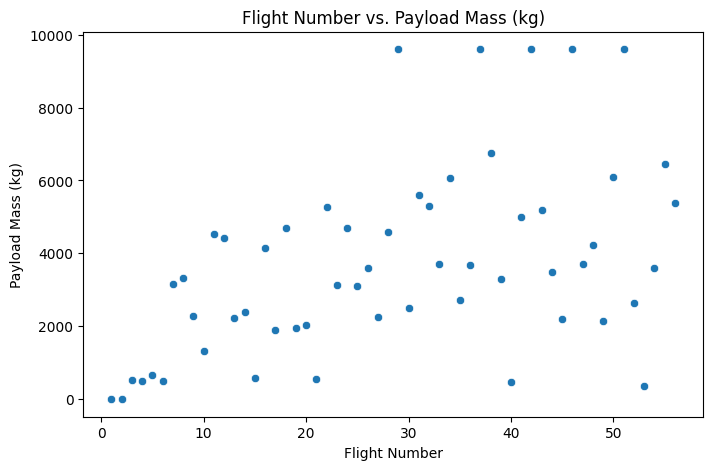

In [ ]:
# Correct the column name for 'Payload Mass'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spacex_df, x="Flight Number", y="Payload Mass (kg)")
plt.title("Flight Number vs. Payload Mass (kg)")
plt.show()


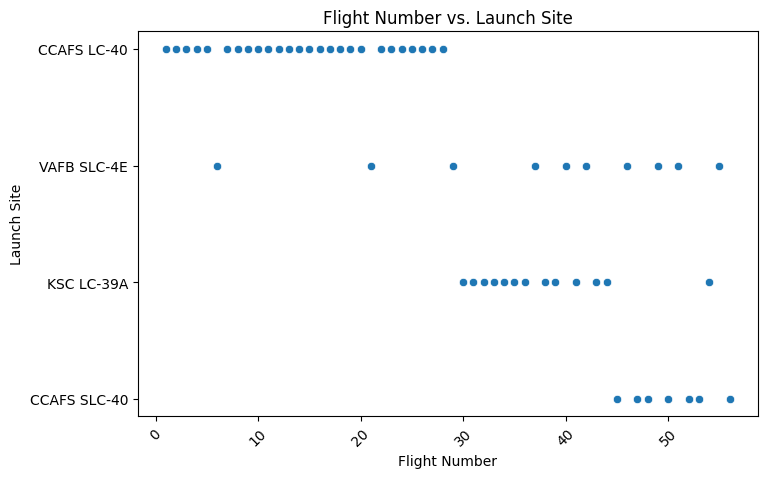

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spacex_df, x="Flight Number", y="Launch Site")
plt.xticks(rotation=45)
plt.title("Flight Number vs. Launch Site")
plt.show()


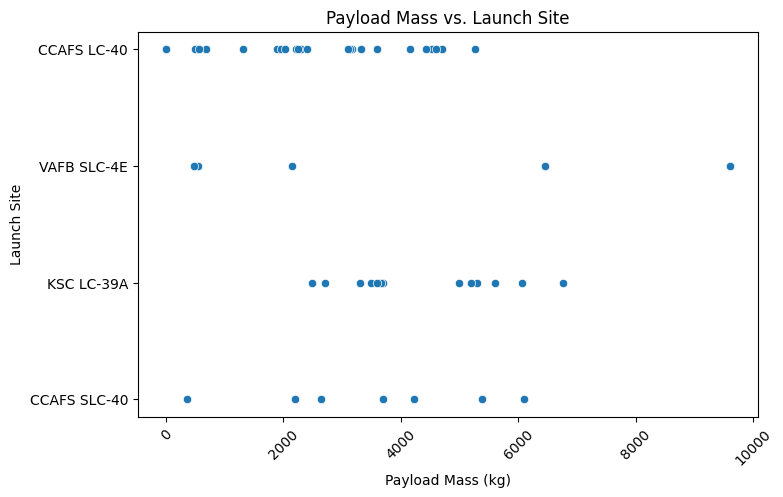

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spacex_df, x="Payload Mass (kg)", y="Launch Site")
plt.xticks(rotation=45)
plt.title("Payload Mass vs. Launch Site")
plt.show()


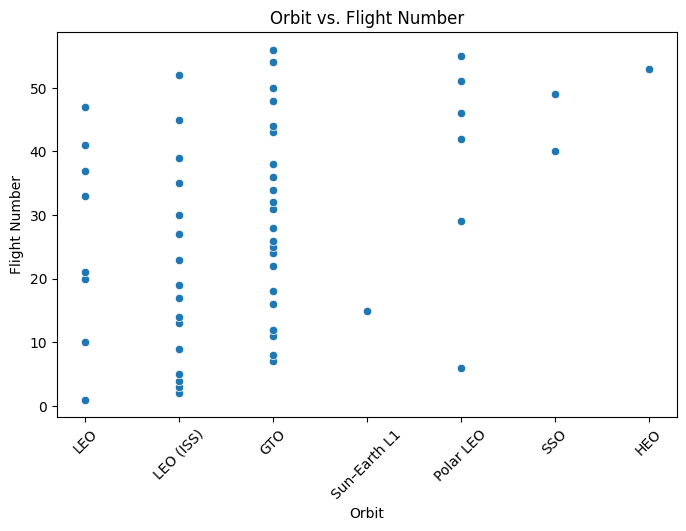

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spacex_df, x="Orbit", y="Flight Number")
plt.xticks(rotation=45)
plt.title("Orbit vs. Flight Number")
plt.show()


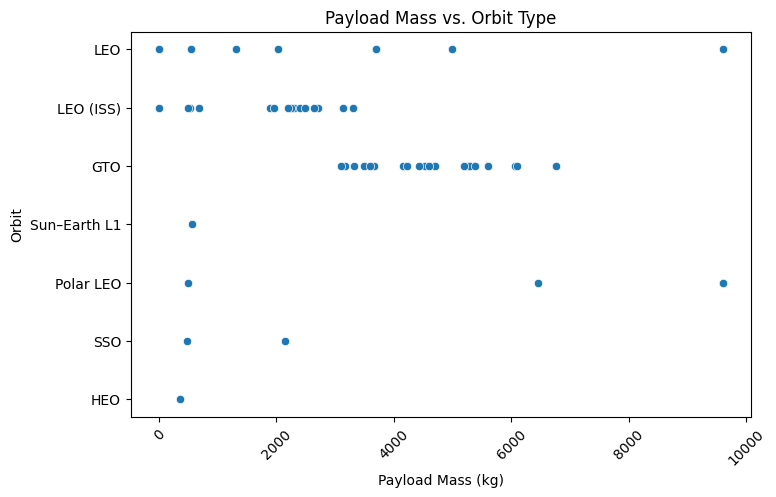

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spacex_df, x="Payload Mass (kg)", y="Orbit")
plt.xticks(rotation=45)
plt.title("Payload Mass vs. Orbit Type")
plt.show()


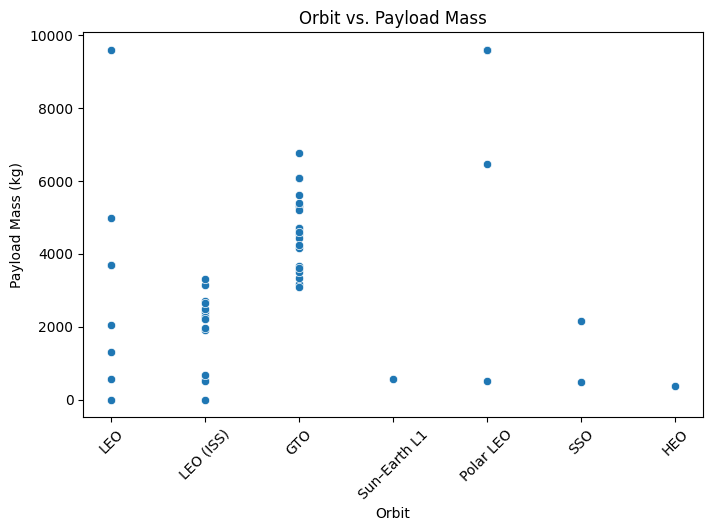

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spacex_df, x="Orbit", y="Payload Mass (kg)")
plt.xticks(rotation=45)
plt.title("Orbit vs. Payload Mass")
plt.show()


In [ ]:
import folium

# Initialize the map at a starting location (latitude, longitude) and zoom level
map_center = [28.5721, -80.6480]  # Example: Kennedy Space Center, FL
folium_map = folium.Map(location=map_center, zoom_start=6)


In [ ]:
# Add a marker at Kennedy Space Center
folium.Marker([28.5721, -80.6480],
              popup="Kennedy Space Center",
              tooltip="Click for more info").add_to(folium_map)

# Add a circle around Kennedy Space Center
folium.Circle([28.5721, -80.6480], radius=5000, color='blue', fill=True, fill_color='blue').add_to(folium_map)

# Add a line to another location (e.g., Los Angeles)
folium.PolyLine([(28.5721, -80.6480), (34.0522, -118.2437)], color="red", weight=2.5, opacity=1).add_to(folium_map)

# Add another marker for Los Angeles
folium.Marker([34.0522, -118.2437],
              popup="Los Angeles Launch Site",
              tooltip="Click for more info").add_to(folium_map)


In [ ]:
# Display the map in the notebook
folium_map


In [ ]:
# Save the map as an HTML file
folium_map.save('interactive_map.html')


In [ ]:
from folium.plugins import HeatMap

# Example: list of locations for heatmap (you can replace with your data)
locations = [[28.5721, -80.6480], [34.0522, -118.2437], [28.3922, -80.6077]]

# Adding the heatmap to the map
HeatMap(locations).add_to(folium_map)


In [ ]:
# Display the map with heatmap in the notebook
folium_map


In [ ]:
# Save the map as an HTML file
folium_map.save('interactive_map_with_heatmap.html')


In [ ]:
locations = [
    [28.5721, -80.6480],  # Kennedy Space Center
    [34.0522, -118.2437], # Los Angeles
    [28.3922, -80.6077]   # Cape Canaveral
]


In [ ]:
import pandas as pd
import plotly.express as px

# Sample DataFrame: Replace with your actual data
df = pd.DataFrame({
    'Launch Date': ['2015-01-01', '2016-02-01', '2017-03-01', '2018-04-01', '2019-05-01'],
    'Success': [1, 0, 1, 1, 0]
})

# Convert 'Launch Date' to datetime format
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

# Extract year from 'Launch Date'
df['Year'] = df['Launch Date'].dt.year

# Group by year and calculate the success rate
success_rate = df.groupby('Year')['Success'].mean().reset_index()

# Create a line chart for success rate over the years
fig = px.line(success_rate, x='Year', y='Success', title="Launch Success Yearly Trend")
fig.show()

In [ ]:
import pandas as pd

# Sample DataFrame: Replace with your actual data
df = pd.DataFrame({
    'Launch Site': ['Site A', 'Site B', 'Site C', 'Site A', 'Site B']
})

# Get unique launch site names
unique_launch_sites = df['Launch Site'].unique()

# Display the unique launch site names
print("Unique Launch Sites:", unique_launch_sites)


Unique Launch Sites: ['Site A' 'Site B' 'Site C']


In [ ]:
import folium
from folium import Marker


In [ ]:
folium_map = folium.Map(location=[28.5721, -80.6480], zoom_start=5)  # Example coordinates (Kennedy Space Center)


In [ ]:
# Add markers for each launch site with their respective coordinates and popup text
folium.Marker([28.5721, -80.6480], popup='Site A').add_to(folium_map)  # Site A Coordinates
folium.Marker([28.3922, -80.6077], popup='Site B').add_to(folium_map)  # Site B Coordinates
folium.Marker([34.0522, -118.2437], popup='Site C').add_to(folium_map)  # Site C Coordinates


In [ ]:
import pandas as pd

# Sample DataFrame: Replace with your actual data
df = pd.DataFrame({
    'Launch Site': ['CCA Site A', 'CCA Site B', 'Other Site C', 'CCA Site D', 'Other Site D']
})

# Filter launch site names that begin with 'CCA'
launch_sites_cc = df[df['Launch Site'].str.startswith('CCA')]['Launch Site']

# Display the filtered launch sites
print("Launch Sites that begin with 'CCA':", launch_sites_cc)


Launch Sites that begin with 'CCA': 0    CCA Site A
1    CCA Site B
3    CCA Site D
Name: Launch Site, dtype: object


In [ ]:
folium_map = folium.Map(location=[28.5721, -80.6480], zoom_start=5)  # Adjust to appropriate center


In [ ]:
# Add markers for each "CCA" launch site
folium.Marker([28.5721, -80.6480], popup="CCA Site A").add_to(folium_map)  # Site A Coordinates
folium.Marker([28.3922, -80.6077], popup="CCA Site B").add_to(folium_map)  # Site B Coordinates
folium.Marker([34.0522, -118.2437], popup="CCA Site D").add_to(folium_map)  # Site D Coordinates


In [ ]:
import pandas as pd

# Sample DataFrame: Replace with your actual data
df = pd.DataFrame({
    'Booster Version': ['F9 v1.1', 'F9 v1.1', 'F9 v1.2', 'F9 v1.1', 'F9 v1.2'],
    'Payload Mass (kg)': [5000, 7000, 6000, 4500, 5500]
})

# Filter the data for 'F9 v1.1'
f9_v1_1_payload = df[df['Booster Version'] == 'F9 v1.1']

# Calculate the average payload mass for F9 v1.1
average_payload_mass = f9_v1_1_payload['Payload Mass (kg)'].mean()

# Display the average payload mass
print("Average Payload Mass by F9 v1.1:", average_payload_mass)


Average Payload Mass by F9 v1.1: 5500.0
